# Autoencoders



- <img src="vae_images/AE.png" alt="drawing" width="500"/>

    - Input: $x$
    - Output $\hat{x} = Dec(Enc(x;\phi);\theta)$
    - Reconstruction Loss: $\mathcal{L}(x,\hat{x}; \phi,\theta)$, eg. $\|x-\hat{x}\|_2^2$ (MLE for fixed-var. Gaussian)


- Reconstruction from: $\textit{bottleneck}$, or $\textit{code}$, or $\textit{latent-space representation}$.
    - Bottleneck forces AE to capture the most salient features of the data. 
    - $\textit{Undercomplete Autoencoder}$ above.
    - Can we make the latent the same dimensions as the input?


- Lossy compression via non-linear dimensionality reduction:
     - Are you aware of other lossy compression methods? (in audio? in images?)
     - lossless? (in text? in images?)
     - What are the advantages and disadvantages? (compression rates? quality? "specified algorithms?")
     - The field of compression is basically the field of **information theory**.
     
     
- The "non-linear" version of PCA (linear encoder, linear decoder) 
    <img src="vae_images/PCA_AE.png" alt="drawing" width="400"/>
    
    
- Why you may want to compress your signals? 

     - Filter out observation noise, by passing through a bottleneck.  <img src="vae_images/denoising_AE.png" alt="drawing" width="700"/>
         - How did we train it to remove the noise?
     
 - You may also need the $\textbf{representation}$ of the signal? (saving? transmission? $\textbf{generation}$?)

# Structure In the latent space?

- AE can "cheat"! It can send the representations of data points far away in order to minimize the reconstruction, even though we expect this "clustering", to induce some perceptual grouping. 
    
<img src="vae_images/AE_space.png" alt="drawing" width="300"/>

    
- Cannot trust the distances in the latent space, neither the topology. 


- We can constrain the z-space using regularization (Eg. $L_1$-norm on $z$).
- VAEs can be seen as autoencoders thet use a particular regularizer; but they are much more than that. 


- AEs are not **generative**, but they can be turned into gm (Variational AE), with the "correct regularizer". 
    - There is no probabilistic structure in an AE to sample from.
    - The latent is usually discontinuous and holes create problems during sampling. Why? Because without a notion of topology, sampling from a region of the latent that the decoder has never seen during training will produce garbage.
    - We need a latent space which is simple to sample from and that we know that the corresponding image will belong in the "image manifold".


- Other structures in the latent space:
    - Interpolation.
    - Extrapolation.
    - Vector Arithmetics.
    - Disentaglement
    - Particular manifold structure (eg. Rotations)
    

## Variational Inference

- Calculus of variations for $\color{red}{\text{Bayesian Inference}}$.

- Turns a, usually intractable, estimation problem (finding the $\color{red}{\text{posterior}}$) into a (functional) optimization one. $$\color{red}{\text{P(z|x)}} = \frac{P(x|z)P(z)}{P(x)}$$


- It is a deterministic approximation of the posterior. Alternative approximations involve sampling methods (Markov Chain Monte Carlo) which are non-deterministic but exact in the limit of infinite samples. 


- VI has been around before the DL hype, but was not scalable. Recent advances involved:

     - Stochastic VI, (for scalability)
     - Amortization, (Connection with AEs; as a way to create a richer parametric posterior)
     - Reparametrization trick, (as a low variance estimator, that permits backpropagation)
            
- More on Monday...

# Variational Autoencoders

- [VAEs paper](https://arxiv.org/abs/1312.6114). Kingma also invented Adam!


- The "trick" to train the denoising AE was to add noise in the input. 
- The "trick" to create a continuous latent space, is to sample around the generated code.
- For example after generating a latent code, we can sample a Gaussian with this mean, and some trainable variance. (Why not fixed ?)
- But with just reconstruction loss the AE can still cheat, by training the encoder to make the variance very small, or push the means very far away. This makes decoding easier (so the reconstructed samples will look great), but creates holes in the latent space.


<img src="vae_images/VAE_noKL.png" alt="drawing" width="450"/>

- Ideally, we would like to be able to achieve interclass interpolation in the figure above.


- How can we "constrain" the space of z? densely pack the codings? We could put a prior $p(z)$ eg. a Normal, and then not only try to reconstruct x ($p(x|z)$) but also try to approximate the normal in the latent space $q(z|x)$ close to $p(z)$.


- One way to measure distance between distributions is the KL-divergence: $KL(q||p) = \mathbb{E}_{q}[\log\frac{q}{p}]$.
    - When is KL equal to 0?
    - Keep an eye in class for an "information-theoretic" interpretation of KL.
    - As well as its weaknesses. (Also HW5P1 will give you a hint about that). 
    - Since prior is Normal let's make the variational posterior normal too (not necessary): $q(z|x) = \mathcal{N}(z; \mu_{\phi}(x), diag\{\sigma^2_{i}(x;\phi)\})$.
    - Then, KL regularizer has a closed form formula: $KL(q(z|x)||p(z)) = \sum_{i=1}^n \sigma^2_i + \mu^2_i - \log(\sigma_i) - 1$



<img src="vae_images/prior_z.png" alt="drawing" width="450"/>


- Loss (Evidence Lower Bound (for $\beta=1$)): $\mathbb{E}_{q_\phi(z|x)}[\log p_\theta(x|z)] - \beta KL[q_\phi(z|x)|| p(z)]$


<img src="vae_images/VAE_latent.png" alt="drawing" width="350"/>

- An equilibrium between:
    - $\textit{dense-packing}$ form of KL-divergence.
    - $\textit{cluster-forming}$ nature of reconstruction loss.

- Variational AutoEncoder:

<img src="vae_images/VAE.png" alt="drawing" width="550"/>


- Observe how we moved into a probabilistic framework. 
    - There is a distribution over the decoded samples $p(x|z)$.
        - We saw before that the reconstruction loss of AEs could also be interpreted that way. VAEs are probabilistic models and make this explicit. 
    - There is a distribution over the latent space $p(z)$.
        - This makes some codings very unlikely, thus constraining the critical mass of the codings that can be observed. It also creates a notion of continuity in the latent space (assume Gaussian prior for now) and a way to sample from it.
 
  - There is a distribution $q(z|x)$ from the encoder.
       - Wait a minute... Intuitively, if we know how each z is decoded into a gaussian in the output of the decoder...then we must also know how each x is mapped into some (maybe more than 1) z. Otherwise, there would be a missmatch between the encoder's input space and the decoder's output space. This is made exact if we think about the Bayes Rule. We know the prior and the likelihood, so $q(z|x)$ must actually play the role of the posterior $p(z|x)$ in order to achieve consistency. So, the target distribution for $q(z|x)$ is not $p(z)$, as could someone naively infer from the form of the regularization, but actually $p(z|x)$.
       
    - Think about the scenario that the KL divergence is 0. Then, $q(z|x) \approx p(z), ~ \forall x$ and the z-space would look like the figure below. As you can see, reconstruction is impossible in this case. Now, there are two possible scenaria. Either $q(z|x)$ is not close to the posterior $p(z|x)$, which creates inconsistency between the encoding and the decoding, Or $q(z|x) \approx p(z|x)$, as it should, and if you apply the Bayes rule you can easily see that in this case it should also hold that: $p(x|z) \approx p(x)$, which means that the code provides zero information about the reconstruction. (See also the tradeoff of reconstruction and KL in the figure above).
        
<img src="vae_images/onlyKL.png" alt="drawing" width="350"/>
  
  
  
- Again, there are 3 forces you should consider:
    - Once you choose a parametric family for $q(z|x)$, there is a trade-off between the "dense-packing" form of KL and the "cluster-forming" form of the REC. Ideally, they should drive $q(z|x)$ towards $p(z|x)$ as close as possible. 
    - The only thing preventing us from reaching $p(z|x)$ exactly is the fact that we already chose a parametric distribution for $q(z|x)$ (eg a Gaussian), but nobody guarantees that the actual posterior is a Gaussian. So the third force, is this modelling assumption for the variational posterior. 
    - In practice, this means that a large ELBO (or a small loss) is good only if $q(z|x) \approx p(z|x)$.

# Vanilla VAE

In [1]:
from torchvision.datasets import MNIST
from torch.utils.data import TensorDataset, DataLoader
import torch
from torch import nn
from torch import optim
import numpy as np
import matplotlib.pylab as plt

In [2]:
data = MNIST('mnist', download=True, train=True)
new_train_labels = torch.zeros(60000, 10)
observed = np.random.choice(60000, 3000)
new_train_labels[observed] = torch.eye(10)[data.train_labels][observed]
train_data = TensorDataset(data.train_data.view(-1, 28 * 28).float() / 255,
                           new_train_labels)

data = MNIST('mnist', download=True, train=False)
test_data = TensorDataset(data.test_data.view(-1, 28 * 28).float() / 255,
                          data.test_labels)

0it [00:00, ?it/s]

9920512it [00:01, 8858798.39it/s]                             


Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz to mnist/MNIST/raw


32768it [00:00, 515362.58it/s]
  1%|          | 16384/1648877 [00:00<00:10, 154856.95it/s]

Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/MNIST/raw


1654784it [00:00, 5882903.46it/s]                           
0it [00:00, ?it/s]

Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST/raw


8192it [00:00, 145518.74it/s]


Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST/raw
Processing...
Done!


/home/sheil/miniconda3/envs/TF/lib/python3.7/site-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/home/sheil/miniconda3/envs/TF/lib/python3.7/site-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/home/sheil/miniconda3/envs/TF/lib/python3.7/site-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/home/sheil/miniconda3/envs/TF/lib/python3.7/site-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


#### Distributions (look at $\textit{torch.distributions}$) package:

In [3]:
class BernoulliVector():
    def __init__(self, logits):
        self.logits = logits

    def log_prob(self, x):
        pixelwise_log_probs = (
            x * (self.logits - nn.functional.softplus(self.logits))
            - (1 - x) * nn.functional.softplus(self.logits)
        )
        return pixelwise_log_probs.sum(1)
    
    def sample(self):
        samples = (
            torch.sigmoid(self.logits)
            >= torch.rand_like(self.logits))
        return samples

In [4]:
class MultivariateNormalDiag():
    def __init__(self, loc=None, scale=None):
        self.loc = loc
        self.scale = scale
        
    def log_prob(self, z):
        normalization_constant = (
            - self.scale.log()
            - 0.5 * np.log(2 * np.pi))
        square_term = -0.5 * ((z - self.loc) / self.scale) ** 2
        log_prob_vec = normalization_constant + square_term
        return log_prob_vec.sum(1)
        
    def sample(self):
        z = self.loc + self.scale * torch.randn_like(self.scale)
        return z

In [5]:
d, nh, D = 32, 100, 28 * 28

enc = nn.Sequential(
    nn.Linear(D, nh),
    nn.ReLU(),
    nn.Linear(nh, nh),
    nn.ReLU(),
    nn.Linear(nh, 2 * d)) # mind the non-linearities at the final layer

dec = nn.Sequential(
    nn.Linear(d, nh),
    nn.ReLU(),
    nn.Linear(nh, nh),
    nn.ReLU(),
    nn.Linear(nh, D)) # <-----------------------------------------------

 - The objective (one sample per datum in batch) becomes: $\max_{\theta,\phi} \mathcal{L}(x,\theta,\phi) = \frac{1}{N}\sum_{n=1}^N \log p(x_n|z_n,\phi) + \log p(z_n) - \log q(z_n|x_n,\theta)$

In [6]:
def loss(x, encoder, decoder):
    # encoder
    q_loc_scale = encoder(x)
    qz_x = MultivariateNormalDiag(q_loc_scale[:, :d],
                                  nn.functional.softplus(q_loc_scale[:, d:]) + 1e-5)
    z = qz_x.sample()
    pz = MultivariateNormalDiag(torch.zeros_like(z), torch.ones_like(z))
    px_z_logits = decoder(z)
    px_z = BernoulliVector(px_z_logits)
    return (px_z.log_prob(x) + pz.log_prob(z) - qz_x.log_prob(z)).mean()

# Reparametrization Trick.

- <img src="vae_images/reparam_trick.png" alt="drawing" width="550"/> 

- We need unbiased gradients of the loss, since we cannot compute the expectation in closed form.
- This is trivial for the gradients w.r.t. the parameters of the decoder $\theta$. We just exchange the gradient and the expectation: $\nabla_\theta \mathbb{E}_{q_\phi(z|x)}[f(z;\theta)]  = \mathbb{E}_{q_\phi(z|x)} \nabla_\theta f(z;\theta)$. Now we get an expectation again, which we can approximate with samples from $q_\phi(z|x)$
- It gets more complicated for the gradients w.r.t. the encoder's parameters $\phi$. Because those parameters are inside the density, over which we take the expectation. 
    - And what about it? Let's exchange the order again: $\nabla_\phi \mathbb{E}_{q_\phi(z|x)}[f(z)]  = \int f(z) \nabla_\phi q_\phi(z|x) dz$
    - Oops! Now we do not have an expectation anymore. Just a regular high-dimensional integral. Approximating high dimensional integrals is still an open problem. 
    - But if they can be written as an expectation, then Monte Carlo sampling gives a good approximator. (The error bars, are given from a Chernoff bound, which as you rememeber, drops exponentially with the samples).


- We apply a "trick" to obtain them, by externalizing the randomness, to get the gradients only for the parameters. This cannot be done for all distributions, let's look at the Gaussian; the chicken-soup of distributions...
- $z \sim q_\phi(z|x) = \mathcal{N}(\mu_\phi(x), \sigma^2_\phi(x)I) \implies z = \mu_\phi(x) + \epsilon \odot \sigma_\phi(x), \quad \epsilon \sim \mathcal{N}(0,I)$
- In general, if $z = g(\epsilon,\phi)$, where $g()$ is some deterministic differentiable transformation then: 
    - $\nabla_\phi \mathbb{E}_{q_\phi(z|x)}[f(z)] = \nabla_\phi \mathbb{E}_{p(\epsilon)}[ f(g(\epsilon,\phi))]=\mathbb{E}_{p(\epsilon)}[\nabla_\phi f(g(\epsilon,\phi))]$ (Law Of The Unconscious Statistician)
- $f(z) = \log p(x|z) = \log \mathcal{N}(x; \mu_{\theta}(z), diag\{\sigma^2_{i}(z;\theta)\})$, in this case.


- The reparametrization trick applies only to continuous distributions. Mind that we still need the gradient of $g(\epsilon,\phi)$ (where??), which means that this transformation has to be differentiable, so continuous, so the random variable z had to be continuous for this to exist. (Extensions/Approximations exist for the discrete case)

In [7]:
from itertools import chain

def train_model(encoder, decoder, batch_size=100, num_epochs=3, learning_rate=1e-3):
    gd = optim.Adam(chain(encoder.parameters(), decoder.parameters()), lr=learning_rate)
    dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)
    train_losses = []
    test_results = []
    for _ in range(num_epochs):
        for i, (batch, _) in enumerate(dataloader):
            total = len(dataloader)
            loss_value = loss(batch, encoder, decoder)
            (-loss_value).backward()
            train_losses.append(loss_value.cpu().item())
            if (i + 1) % 10 == 0:
                print('\rTrain loss:', train_losses[-1],
                      'Batch', i + 1, 'of', total, ' ' * 10, end='', flush=True)
            gd.step()
            gd.zero_grad()
        test_elbo = 0.
        for i, (batch, _) in enumerate(test_dataloader):
            batch_elbo = loss(batch, encoder, decoder) # Loss has more than one parts. Monitor them all !!
            test_elbo += (batch_elbo - test_elbo) / (i + 1)
        print('\nTest loss after an epoch: {}'.format(test_elbo))

In [8]:
train_model(enc, dec, num_epochs=16)

Train loss: -175.6579132080078 Batch 600 of 600            
Test loss after an epoch: -173.41929626464844
Train loss: -143.15406799316406 Batch 600 of 600           
Test loss after an epoch: -142.87498474121094
Train loss: -130.3368377685547 Batch 600 of 600            
Test loss after an epoch: -130.85791015625
Train loss: -123.82132720947266 Batch 600 of 600           
Test loss after an epoch: -124.54638671875
Train loss: -119.0575942993164 Batch 600 of 600            
Test loss after an epoch: -120.3523178100586
Train loss: -121.91464233398438 Batch 600 of 600           
Test loss after an epoch: -117.8902359008789
Train loss: -117.60052490234375 Batch 600 of 600           
Test loss after an epoch: -115.71713256835938
Train loss: -113.99215698242188 Batch 600 of 600           
Test loss after an epoch: -114.53714752197266
Train loss: -114.17111206054688 Batch 600 of 600           
Test loss after an epoch: -113.7169418334961
Train loss: -115.42664337158203 Batch 600 of 600       

#### Reconstructions

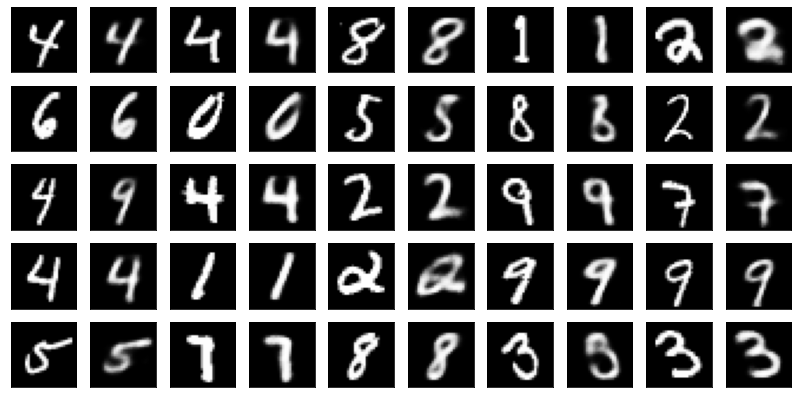

In [9]:
def plot_reconstructions(encoder, decoder):
    batch = test_data[np.random.choice(10000, 25)][0]
    rec = torch.sigmoid(decoder(encoder(batch)[:, :d]))
    rec = rec.view(-1, 28, 28).data
    batch = batch.view(-1, 28, 28).numpy()
    
    fig, axes = plt.subplots(nrows=5, ncols=10, figsize=(14, 7),
                             subplot_kw={'xticks': [], 'yticks': []})
    for i in range(25):
        axes[i % 5, 2 * (i // 5)].imshow(batch[i], cmap='gray')
        axes[i % 5, 2 * (i // 5) + 1].imshow(rec[i], cmap='gray')
plot_reconstructions(enc, dec)

#### Encode and Interpolate. 

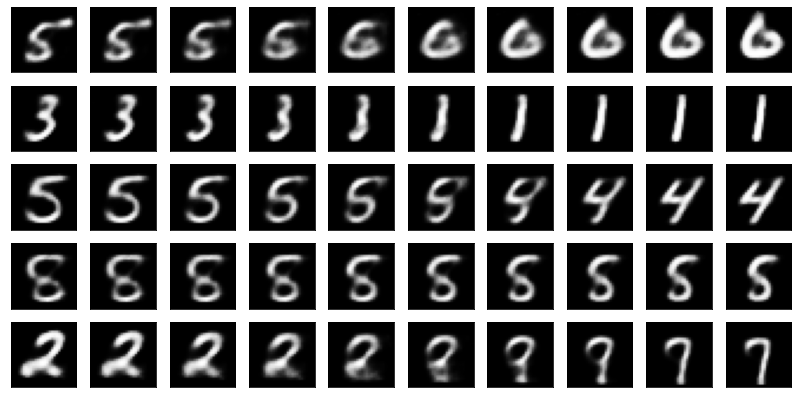

In [10]:
def plot_interpolations(encoder, decoder):
    batch = encoder(test_data[np.random.choice(10000, 10)][0])
    z_0 = batch[:5, :d].view(5, 1, d)
    z_1 = batch[5:, :d].view(5, 1, d)
    alpha = torch.tensor(np.linspace(0., 1., 10), dtype=torch.float32)
    alpha = alpha.view(1, 10, 1)
    interpolations_z = (z_0 * alpha + z_1 * (1 - alpha))
    interpolations_z = interpolations_z.view(50, d)
    interpolations_x = torch.sigmoid(decoder(interpolations_z))
    interpolations_x = interpolations_x.view(5, 10, 28, 28).data.numpy()
    
    fig, axes = plt.subplots(nrows=5, ncols=10, figsize=(14, 7),
                             subplot_kw={'xticks': [], 'yticks': []})
    for i in range(50):
        axes[i // 10, i % 10].imshow(interpolations_x[i // 10, i % 10], cmap='gray')
plot_interpolations(enc, dec)

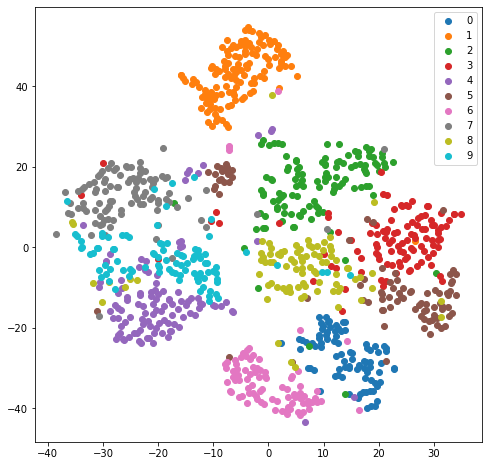

In [11]:
def plot_tsne(objects, labels):
    from sklearn.manifold import TSNE
    embeddings = TSNE(n_components=2).fit_transform(objects)
    plt.figure(figsize=(8, 8))
    for k in range(10):
        embeddings_for_k = embeddings[labels == k]
        plt.scatter(embeddings_for_k[:, 0], embeddings_for_k[:, 1],
                    label='{}'.format(k))
    plt.legend()

latent_variables = enc(test_data[:1000][0])[:, :d]
latent_variables = latent_variables.data.numpy()
labels = test_data[:1000][1].numpy()

plot_tsne(latent_variables, labels)

- Digit Manifold

<img src="vae_images/manifold_digits.png" alt="drawing" width="550"/> 

# Some Applications:

    - Conditional VAEs and Style Transfer (Generate from p(x|z,y_new)).
    
   <img src="vae_images/cvae_style.png" alt="drawing" width="550"/> 
    
    - Image faces manifold (Interpret latent dimensions). Also, observe that for each dimension only 1 semantic characteristic changes, as we hold all z-dimensions fixed and we change the one. This is connected with the notion of disentaglement. As $q(z|x)$ gets closer to $p(z)$ for all x's, since $p(z)$ is a canonical Normal, all its dimensions become more and more uncorrelated. As $\beta$-coefficient gets bigger this is promoted more too. 
    
   <img src="vae_images/manifold_faces.png" alt="drawing" width="350"/>  
    
    - VAEs tend to generate blurry images
    
   <img src="vae_images/blurry_images.png" alt="drawing" width="550"/> 
   
    - Recently, High Quality Hierarchical VAE
    
   <img src="vae_images/NVAE.png" alt="drawing" width="550"/> 
    

## Practical Advice:

- *Torch.distributions*: [helpful blog to understand the shapes](https://bochang.me/blog/posts/pytorch-distributions/)
    - log_prob(), sample().


- Variational Posterior $q(z|x)$ can be sampled more than once.


- Variational Posterior, Prior, Likelihood do not need to be Normal.
- Additionally, $KL(q(z|x) || p(z))$ does not need to be computable in closed form. After all, it is an expectation, so Monte Carlo. 


- Output distribution $p(x|z)$ depends on the problem:
    - MNIST dataset?
    - CIFAR dataset?
    - RL setting? Output action given state?


- What if the parameters of the distributions have constraints?
    - Gaussian $\sigma >0$.
    - Bernoulli $p \in [0,1]$
    - Full Gaussian $\Sigma \succ 0 $


- Monitor both losses (Reconstruction and KL divergence) separately! 


- Image Generation involves, sampling the latent, transform it and sampling from the decoder.
    - Where is the encoder ? Is the encoder still useful for any task?
    - In papers, people do not sample from the decoder. 
    
    
- Usually, Gaussian likelihood $p(x|z)$ with fixed $\sigma$. Otherwise, difficult training, as the decoder's variance collapses to 0.(Think why this happens; also see the link at the bottom).


- higher $\beta$ promotes "disentanglement", because it pushes the KL down and the dimensions of the latent become more uncorrelated (why? look at the prior). But tuning $\beta$ has negative effects, too...


- Take a look at this link http://ruishu.io/2018/03/14/vae/

- Take a look at this link for an intuitive explanation of the ELBO: https://towardsdatascience.com/variational-autoencoder-demystified-with-pytorch-implementation-3a06bee395ed